In [6]:
import pandas as pd
import numpy as np
import klib
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from warnings import filterwarnings
filterwarnings('ignore')

df=pd.read_csv('C:/Users/DELL/Desktop/veri bilimi kampı/Advertising.csv')
data=df.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [13]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: >

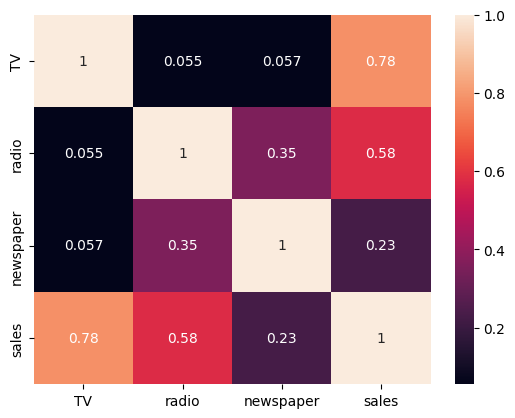

In [14]:
sns.heatmap(df.corr(),annot=True)  #%60lık etki 

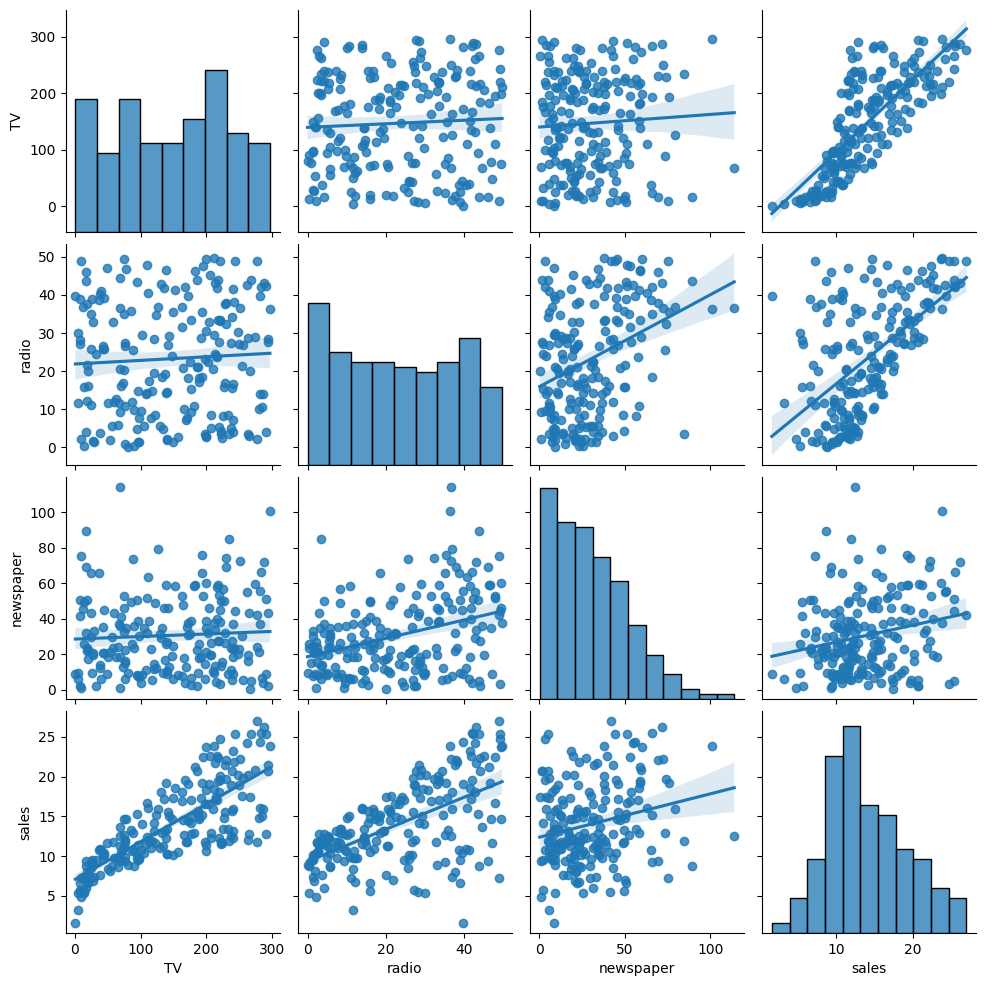

In [15]:
sns.pairplot(df, kind='reg')

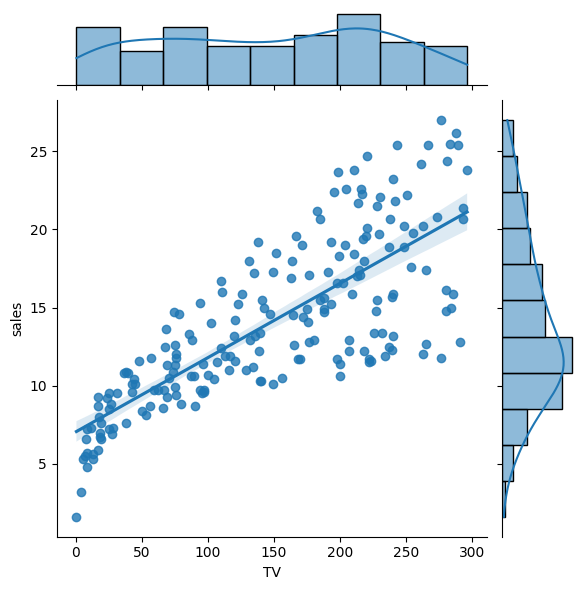

In [17]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg")  #noktalar gerçek değer çizgi doğrusu tahmin değeri aradaki fark hata değeri için kullanılıyomuş glb

In [19]:
from sklearn.linear_model import LinearRegression

In [74]:
x= df[["TV"]]
y= df["sales"]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [58]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [59]:
reg= LinearRegression()
model= reg.fit(x,y)

In [60]:
model.intercept_
model.coef_

array([0.04753664])

y=model.intercept_ + model.coef_[0].TV

In [61]:
print(f"y = {model.intercept_} + {model.coef_[0]}.TV")

y = 7.032593549127695 + 0.04753664043301975.TV


In [62]:
TV= 13
y= 7.03259355 + 0.04753664*TV
y

7.65056987

In [63]:
model.predict([[13]]) #model.predict(np.array([[13]]))

array([7.65056987])

In [64]:
yeni_veri= [[15],[3],[100],[21],[32]]
model.predict(yeni_veri)  #sales tahmin oranlarını verdi

array([ 7.74564316,  7.17520347, 11.78625759,  8.030863  ,  8.55376604])

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
reg.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [75]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [68]:
h_g=pd.DataFrame({"gercek_y":df['sales'][0:10], "tahmin_y":reg.predict(x)
                  [0:10]})
h_g

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [69]:
h_g['hata']= h_g['gercek_y'] - h_g['tahmin_y']

In [70]:
h_g['hata_kare']=h_g['hata']**2
h_g

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [71]:
np.sum(h_g['hata_kare'])

92.90350329638102

In [72]:
np.mean(h_g['hata'])

0.20389815715192333

In [73]:
np.sqrt(np.mean(h_g['hata_kare']))

3.048007599996775

In [77]:
from sklearn.model_selection import train_test_split
x=df.drop(['sales'],axis=1)
y=df['sales']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [78]:
lm=LinearRegression()
model=lm.fit(X_train,y_train)

In [79]:
model.intercept_

2.994893030495323

In [80]:
model.coef_

array([ 0.04458402,  0.19649703, -0.00278146])

In [85]:
rmse=np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
rmse

1.5513912323520802

In [86]:
mean_squared_error(y_train,model.predict(X_train))

2.406814755818906

In [88]:
model.score(X_test, y_test)

0.8601145185017869

In [89]:
from sklearn.model_selection import cross_val_score

In [92]:
np.mean(cross_val_score(model, X_train, y_train, cv=10, scoring="r2"))

0.8832984266379699

In [93]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [94]:
data = pd.read_csv('C:/Users/DELL/Desktop/veri bilimi kampı/Hitters.csv')
df = data.copy()
df= df.dropna()

dms= pd.get_dummies(df[['League','Division','NewLeague']])
y= df['Salary']
X_=df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [200, 263]

In [95]:
knn_model= KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor()

In [ ]:
knn_model.effective_metric_

In [ ]:
y_pred = knn_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred= knn_model.predicty(y_train,y_pred)
    rmse = np.sqrt(mean_squared_error(y_train,y_pred))
    RMSE.append(rmse)
    print(f"{k} komşu için hata değeri = {rmse}")
    

In [ ]:
from sklearn.model_selection import GridSearchCV
knn_params={'n_neighbors':np.arrange(1,30,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params , cv=10)
knn_cv_model.fit(X_train,y_train)

In [ ]:
knn_cv_model.best_params_

In [ ]:
knn_tuned = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test,knn_tuned.predict))